In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

## Housing Price Prediction for Single Variable

In [2]:
df = pd.read_csv('.\CSV_Files\homeprices.csv')


In [3]:
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Text(0, 0.5, 'price')

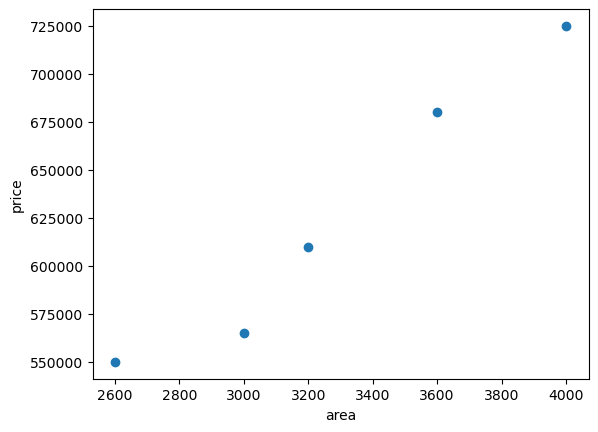

In [4]:
plt.scatter(df.area,df.price)
plt.xlabel('area')
plt.ylabel('price')

In [5]:
# get input data and output data before training

inputArea = df.drop('price', axis='columns')
print(inputArea)

   area
0  2600
1  3000
2  3200
3  3600
4  4000


In [6]:
outputPrice = df.price

In [7]:
outputPrice

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [8]:
# using linear regression model
reg = linear_model.LinearRegression()
reg.fit(inputArea,outputPrice)

LinearRegression()

In [9]:
# test to predict for 3300 sqft

reg.predict([[3300]])

C:\Users\varsh\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [10]:
reg.coef_

array([135.78767123])

In [11]:
reg.intercept_

180616.43835616432

In [12]:
# line formula y = m*X+c (m coef  c is intercept)

y = (reg.coef_ * 3300) + reg.intercept_
print(y)

[628715.75342466]


In [14]:
# taking many area data

area_df = pd.read_csv(r".\CSV_Files\areas.csv")
area_df.head(3)

,area
0,1000
1,1500
2,2300


In [15]:
predictPrices = reg.predict(area_df)
predictPrices

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [16]:
area_df['prices']=predictPrices
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [17]:
area_df.to_csv("prediction.csv")

## Housing Price Prediction for Multiple variables

In [18]:
mvdf = pd.read_csv(r".\CSV_Files\homeprices_multipleVariables.csv")
mvdf

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [20]:
# y = m1*x1 + m2*x2 + m3*x3 

# there is Nan value this can be handles by taking median of whole column

mvdf.bedrooms.median()

4.0

In [22]:
# replace NaN by median value
mvdf.bedrooms = mvdf.bedrooms.fillna(mvdf.bedrooms.median())
mvdf

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [23]:
reg = linear_model.LinearRegression()
reg.fit(mvdf.drop('price',axis='columns'),mvdf.price)

LinearRegression()

In [24]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [25]:
reg.intercept_

221323.00186540408

In [26]:
# Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old

reg.predict([[3000, 3, 40]])

C:\Users\varsh\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [27]:
y = reg.coef_[0]*3000 + reg.coef_[1]*3 + reg.coef_[2]*40 + reg.intercept_

In [28]:
y

498408.25158030697